In [1]:
import numpy as np # scientific computing module
import matplotlib.pyplot as plt # plotting functions module

Ici on definit la grille dans une fonction, car elle dépend de n.

In [16]:
def grid_cyl_restriction(n,rmax=25.,nr=10,dtheta_deg=0.2):
    """Function to define a portion [0,pi/n] cylindrical grid
    Inputs:
      n the angle restriction
      rmax the maximum radius of the grid
      dtheta_deg the angular spacing in degrees
    Outputs:
      X,Y the cylindrical grid in cartesian coordinates
      R,THETA the cylindrical grid in cylindrical coordinates
    """
    # Radial discretization
    rad = np.linspace(0.,rmax,nr)
    # Theta spacing discretisation
    # (since the total range will change it is better than to provide a fixed number of points)
    dtheta = np.deg2rad(dtheta_deg)


    theta = np.arange(0.,np.pi/n,dtheta)
    R,THETA=np.meshgrid(rad,theta)
    # Create the regular grid in cylindrical coordinates on the restriction
    # Create the cartesian coordinate grid for the contour function
    X=R*np.cos(THETA)
    Y=R*np.sin(THETA)
    
    return X,Y,R,THETA

Ici on definit l'écoulement

In [17]:
def ecoulement(A,n,R,THETA):
    """Function to define the flow in the corner
    Inputs: 
        A,n are the parameters of the flow
        R,THETA are the mesh grid in cartesian coordinates for the fields definition
    Outputs:
        PSI,PHI the courant and potential functions
    """
    # On renvoie les fonctions de courant PSI et de potentielle PHI, ainsi que R et THETA
    PSI=A*R**n*np.sin(n*THETA)
    PHI=A*R**n*np.cos(n*THETA)
    
    return PSI,PHI

Une fonction pour le plot aussi

In [18]:
def plot_PSI(X,Y,PSI,nb_contours=37):
    plt.contour(X,Y,PSI,nb_contours)
    plt.plot(X[0,:],Y[0,:],'black',linewidth=2.)
    plt.plot(X[-1,:],Y[-1,:],'black',linewidth=2.)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.title('Ecoulement n={0:.1f}'.format(n))

Cette fois c'est bon, on est prêt à faire l'exercice

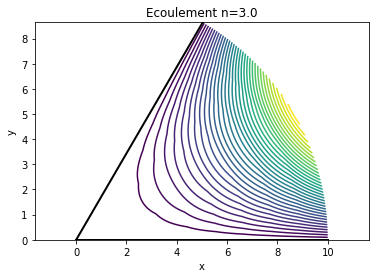

In [15]:
A=1.
n=3
X,Y,R,THETA = grid_cyl_restriction(n)
PSI,PHI = ecoulement(A,n,R,THETA)
plot_PSI(X,Y,PSI)

C'est l'écoulement dans un coin d'angle $\pi/3$

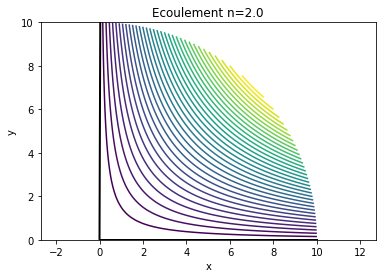

In [6]:
A=1.
n=2
X,Y,R,THETA = grid_cyl_restriction(n)
PSI,PHI = ecoulement(A,n,R,THETA)
plot_PSI(X,Y,PSI)

C'est l'écoulement dans un coin d'angle $\pi/2$

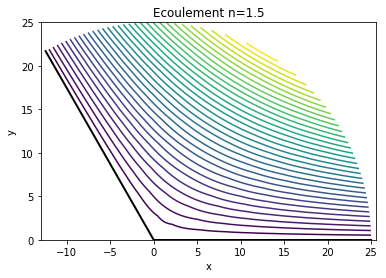

In [19]:
A=1.
n=1.5
X,Y,R,THETA = grid_cyl_restriction(n)
PSI,PHI = ecoulement(A,n,R,THETA)
plot_PSI(X,Y,PSI)

C'est l'écoulement dans un coin d'angle $2\pi/3$

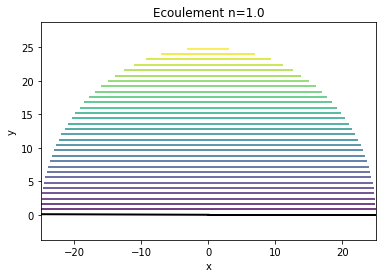

In [20]:
A=1.
n=1
X,Y,R,THETA = grid_cyl_restriction(n)
PSI,PHI = ecoulement(A,n,R,THETA)
plot_PSI(X,Y,PSI)

C'est l'écoulement sur un plan

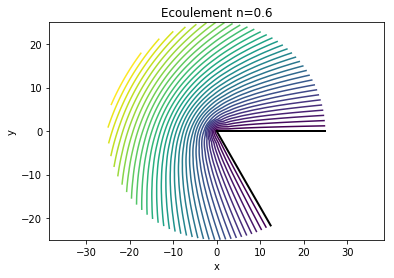

In [21]:
A=1.
n=0.6
X,Y,R,THETA = grid_cyl_restriction(n)
PSI,PHI = ecoulement(A,n,R,THETA)
plot_PSI(X,Y,PSI)

C'est l'écoulement **autour** d'un coin d'angle $\pi/3$

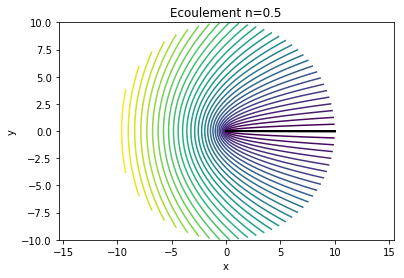

In [10]:
A=1.
n=0.5
X,Y,R,THETA = grid_cyl_restriction(n)
PSI,PHI = ecoulement(A,n,R,THETA)
plot_PSI(X,Y,PSI)

C'elle la elle est dure : c'est l'écoulement qui fait un 360 ! Une figure assez freestyle, d'ailleurs c'est pas très bon la vitesse vaut $+\infty$ en 0.